In [2]:
!pip3 install git+https://github.com/holounic/Bayesian-Optimization.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/holounic/Bayesian-Optimization.git to /tmp/pip-req-build-o3_7jpso
  Running command git clone -q https://github.com/holounic/Bayesian-Optimization.git /tmp/pip-req-build-o3_7jpso
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/holounic/pyDOE to /tmp/pip-install-tvwvt5iq/pydoe_cc7b275eb60243f494b6d2baf63738bd
  Running command git clone -q https://github.com/holounic/pyDOE /tmp/pip-install-tvwvt5iq/pydoe_cc7b275eb60243f494b6d2baf63738bd
     |████████████████████████████████| 316 kB 15.4 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for bayes-optim: filename=bayes_optim-0.2.7-py3-none-any.whl size=145056 sha256=d2d5f8fcf13faafc492932138a1f61f628ca4d6c109db362471a85f42669f60b
  Stored in directory: /tmp/pip-ephem-wheel-cache-

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from benchmark.bbobbenchmarks import F8
from bayes_optim.search_space import RealSpace

In [4]:
dim = 2
lb, ub = -5, 5
space = RealSpace([lb, ub]) * dim
f_name = 'f8'
f = F8

samples = space.sample(50000)

In [5]:
def fix_numeric_data(df):
  regrets = [float(x[1:-1]) for x in df['regret'].tolist()]
  df['regret'] = regrets
  return df

In [6]:
def minmax_normalisation():
  minmax = []
  for i in range(50):
    func = f(i)
    minmax.append(func(samples).max() - func.getfopt())
  return minmax

In [7]:
def abs_normalisation():
  n = []
  for i in range(50):
    func = f(i)
    n.append(func(samples).mean() - func.getfopt())
  return n

In [9]:
cma_es = fix_numeric_data(pd.read_csv(f'{f_name}_cma_es_doe_normalized.csv')[['regret', 'f_s']]).rename(columns={'regret': 'cma_es_regret'})
cma_es_init = fix_numeric_data(pd.read_csv(f'{f_name}_lhs_initial_doe_normalized.csv')[['regret', 'f_s']]).rename(columns={'regret': 'lhs_init_regret'})
uniform = fix_numeric_data(pd.read_csv(f'uniform_doe_{f_name}.csv')[['regret', 'f_s']]).rename(columns={'regret': 'uniform_regret'})
lhs = fix_numeric_data(pd.read_csv(f'lhs_doe_{f_name}.csv')[['regret', 'f_s']]).rename(columns={'regret': 'lhs_regret'})
halton = fix_numeric_data(pd.read_csv(f'halton_doe_{f_name}.csv')[['regret', 'f_s']]).rename(columns={'regret': 'halton_regret'})
sobol = fix_numeric_data(pd.read_csv(f'sobol_doe_{f_name}.csv')[['regret', 'f_s']]).rename(columns={'regret': 'sobol_regret'})
stats = cma_es.merge(uniform.merge(lhs.merge(sobol.merge(halton.merge(cma_es_init)))))
stats['minmax_norm'] = minmax_normalisation()
stats['abs_norm'] = abs_normalisation()
stats.head()

,cma_es_regret,f_s,uniform_regret,lhs_regret,sobol_regret,halton_regret,lhs_init_regret,minmax_norm,abs_norm
0,4.795509,0,13.609549,5.726170,180.139940,1.653551,2.797031,559517.757080,79272.658391
1,0.966131,1,1.542362,2.845405,110.874183,0.082943,1.829519,160489.517860,16422.747218
2,0.622004,2,9.619277,6.730328,0.319268,0.474555,2.330897,691172.375289,108956.923975
3,3.043431,3,21.783295,0.546522,1.629811,3.425719,7.584926,239134.159628,25849.225798
4,15.698642,4,3.623685,10.813254,2.041338,0.613731,1.236061,185172.659631,18948.642007


# CMA-ES vs first individual (generated by LHS)

In [10]:
cma_init = stats.loc[stats['cma_es_regret'] < stats['lhs_init_regret']]
print(f'CMA-ES improved lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret']]

CMA-ES improved lhs DoE on 32, (64.0%) function instances


,f_s,cma_es_regret,lhs_init_regret
1,1,0.966131,1.829519
2,2,0.622004,2.330897
3,3,3.043431,7.584926
5,5,1.091377,108.060424
7,7,2.130476,4.358627
8,8,0.238367,33.480003
10,10,0.298821,1.618324
11,11,1.198859,3.520898
12,12,0.002897,15.651120
13,13,0.024728,0.437337


In [ ]:
cma_init = stats.loc[stats['cma_es_regret'] > stats['lhs_init_regret']]
print(f'CMA-ES worstened lhs DoE on {cma_init.shape[0]}, ({100 * cma_init.shape[0] / stats.shape[0]}%) function instances')
cma_init[['f_s', 'cma_es_regret', 'lhs_init_regret']]

CMA-ES worstened lhs DoE on 18, (36.0%) function instances


,f_s,cma_es_regret,lhs_init_regret
0,0,4.795509,2.797031
4,4,15.698642,1.236061
6,6,7.149106,0.589937
9,9,6.835748,4.276320
15,15,1.671340,0.739510
17,17,40.470219,3.817055
20,20,0.648662,0.144780
22,22,8.857137,4.212882
23,23,3.932857,0.559743
24,24,11.259810,0.492194


# CMA-ES generated vs Uniform

In [ ]:
cma_uniform = stats.loc[stats['cma_es_regret'] < stats['uniform_regret']]
print(f'DoE generated by CMA-ES is better than uniformly sampled DoE on {cma_uniform.shape[0]}, ({100 * cma_uniform.shape[0] / stats.shape[0]}%) function instances')
cma_uniform[['f_s', 'cma_es_regret', 'uniform_regret']]

DoE generated by CMA-ES is better than uniformly sampled DoE on 30, (60.0%) function instances


,f_s,cma_es_regret,uniform_regret
0,0,4.795509,13.609549
1,1,0.966131,1.542362
2,2,0.622004,9.619277
3,3,3.043431,21.783295
5,5,1.091377,8.317905
6,6,7.149106,17.067246
7,7,2.130476,3.730584
8,8,0.238367,2.690482
10,10,0.298821,0.991652
12,12,0.002897,6.382583


# CMA-ES vs LHS

In [ ]:
cma_lhs = stats.loc[stats['cma_es_regret'] < stats['lhs_regret']]
print(f'DoE generated by CMA-ES is better than lhs sampled DoE on {cma_lhs.shape[0]} ({100 * cma_lhs.shape[0] / stats.shape[0]}%) function instances')
cma_lhs[['f_s', 'cma_es_regret', 'lhs_regret']]

DoE generated by CMA-ES is better than lhs sampled DoE on 27 (54.0%) function instances


,f_s,cma_es_regret,lhs_regret
0,0,4.795509,5.726170
1,1,0.966131,2.845405
2,2,0.622004,6.730328
5,5,1.091377,1.390926
8,8,0.238367,5.594458
10,10,0.298821,0.673689
11,11,1.198859,3.895262
12,12,0.002897,14.490243
13,13,0.024728,0.051349
14,14,4.101530,18.542655


# CMA-ES vs Sobol

In [ ]:
cma_sobol = stats.loc[stats['cma_es_regret'] < stats['sobol_regret']]
print(f'DoE generated by CMA-ES is better than sobol generated DoE on {cma_sobol.shape[0]} ({100 * cma_sobol.shape[0] / stats.shape[0]}%) function instances')
cma_sobol[['f_s', 'cma_es_regret', 'sobol_regret']]

DoE generated by CMA-ES is better than sobol generated DoE on 27 (54.0%) function instances


,f_s,cma_es_regret,sobol_regret
0,0,4.795509,180.139940
1,1,0.966131,110.874183
5,5,1.091377,3.350135
7,7,2.130476,2.383184
8,8,0.238367,3.475825
10,10,0.298821,5.278734
11,11,1.198859,3.641218
12,12,0.002897,32.168563
13,13,0.024728,1.982471
14,14,4.101530,10.617775


# CMA-ES vs Halton

In [ ]:
cma_halton = stats.loc[stats['cma_es_regret'] < stats['halton_regret']]
print(f'DoE generated by CMA-ES is better than halton generated DoE on {cma_halton.shape[0]} ({100 * cma_halton.shape[0] / stats.shape[0]}%) function instances')
cma_halton[['f_s', 'cma_es_regret', 'halton_regret']]

DoE generated by CMA-ES is better than halton generated DoE on 28 (56.0%) function instances


,f_s,cma_es_regret,halton_regret
3,3,3.043431,3.425719
6,6,7.149106,88.397229
8,8,0.238367,4.290194
11,11,1.198859,2.494132
12,12,0.002897,0.448713
13,13,0.024728,1.034911
14,14,4.101530,5.175030
16,16,3.250321,15.126580
18,18,1.623855,4.358441
19,19,0.028016,2.087634


In [ ]:
cma_is_best = stats.loc[(stats['cma_es_regret'] < stats['halton_regret']) & (stats['cma_es_regret'] < stats['uniform_regret']) & (stats['cma_es_regret'] < stats['lhs_regret']) & (stats['cma_es_regret'] < stats['sobol_regret'])]
print(f'DoE generated by CMA-ES is better than any baseline generated DoE on {cma_is_best.shape[0]} ({100 * cma_is_best.shape[0] / stats.shape[0]}%) function instances')
cma_is_best

DoE generated by CMA-ES is better than any baseline generated DoE on 11 (22.0%) function instances


,cma_es_regret,f_s,uniform_regret,lhs_regret,sobol_regret,halton_regret,lhs_init_regret
8,0.238367,8,2.690482,5.594458,3.475825,4.290194,33.480003
12,0.002897,12,6.382583,14.490243,32.168563,0.448713,15.651120
13,0.024728,13,0.279846,0.051349,1.982471,1.034911,0.437337
14,4.101530,14,4.679746,18.542655,10.617775,5.175030,4.198421
18,1.623855,18,32.723888,2.507067,15.198384,4.358441,39.379757
26,0.275482,26,0.390121,14.555896,1.257415,7.872930,1.220697
28,0.001417,28,7.926869,23.465202,2.202189,5.231557,3.761536
30,1.998058,30,10.253377,9.014532,4.894483,2.876440,26.367427
34,1.689692,34,4.629288,6.717339,1.991735,4.760157,3.690812
37,0.220379,37,10.075497,0.429578,2.024670,10.179420,0.754368


In [17]:
best_name = 'uniform_regret'
uniform_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Uniform is the best on {uniform_is_best.shape[0]} ({100 * uniform_is_best.shape[0] / stats.shape[0]}%) function instances')
uniform_is_best

Uniform is the best on 9 (18.0%) function instances


,cma_es_regret,f_s,uniform_regret,lhs_regret,sobol_regret,halton_regret,lhs_init_regret,minmax_norm,abs_norm
11,1.198859,11,0.015744,3.895262,3.641218,2.494132,3.520898,223629.235002,26969.812775
16,3.250321,16,2.531758,3.075374,15.126580,15.126580,15.126580,385274.611209,49827.971101
19,0.028016,19,0.021790,0.785021,5.663329,2.087634,3.674922,116007.081974,14758.229104
20,0.648662,20,0.421819,9.748108,6.565689,95.071721,0.144780,402950.944570,51677.874397
21,2.309291,21,0.203542,0.678020,0.253126,7.237667,8.850184,121049.694383,12032.567325
27,1.089946,27,0.957658,9.368405,5.336286,9.368405,1.669842,505302.109771,73117.830088
31,3.299410,31,0.861433,9.631509,4.086421,4.191165,0.607472,100547.636851,12040.078514
33,22.463233,33,3.774195,9.469742,17.589977,17.589977,2.157148,385824.622743,49963.419785
39,5.605437,39,2.914557,3.482400,27.430829,11.162774,2.295616,673482.543632,101953.629456


In [16]:
best_name = 'halton_regret'
halton_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Halton is the best on {halton_is_best.shape[0]} ({100 * halton_is_best.shape[0] / stats.shape[0]}%) function instances')
halton_is_best

Halton is the best on 12 (24.0%) function instances


,cma_es_regret,f_s,uniform_regret,lhs_regret,sobol_regret,halton_regret,lhs_init_regret,minmax_norm,abs_norm
0,4.795509,0,13.609549,5.726170,180.139940,1.653551,2.797031,559517.757080,79272.658391
1,0.966131,1,1.542362,2.845405,110.874183,0.082943,1.829519,160489.517860,16422.747218
4,15.698642,4,3.623685,10.813254,2.041338,0.613731,1.236061,185172.659631,18948.642007
5,1.091377,5,8.317905,1.390926,3.350135,0.514653,108.060424,194099.682532,19518.385926
10,0.298821,10,0.991652,0.673689,5.278734,0.146404,1.618324,123347.435243,15258.382491
15,1.671340,15,3.323224,8.063670,1.155329,0.503685,0.739510,119436.155828,11854.411725
23,3.932857,23,3.414229,3.316631,3.330947,1.794291,0.559743,185408.041651,20467.081527
24,11.259810,24,0.924337,3.831702,3.040613,0.073365,0.492194,168601.944679,16918.736798
35,5.380666,35,23.659532,14.619581,9.485711,3.154284,5.523818,325875.049643,39925.818291
43,42.935729,43,13.658159,14.162568,39.833454,2.468937,0.579563,94844.176899,14587.345383


In [15]:
best_name = 'lhs_regret'
lhs_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS is the best on {lhs_is_best.shape[0]} ({100 * lhs_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_is_best

LHS is the best on 11 (22.0%) function instances


,cma_es_regret,f_s,uniform_regret,lhs_regret,sobol_regret,halton_regret,lhs_init_regret,minmax_norm,abs_norm
3,3.043431,3,21.783295,0.546522,1.629811,3.425719,7.584926,239134.159628,25849.225798
7,2.130476,7,3.730584,0.640811,2.383184,1.159588,4.358627,160843.725117,16520.908917
9,6.835748,9,1.780079,0.396686,1.329843,1.300925,4.276320,248550.009966,29620.881909
17,40.470219,17,13.829146,2.417002,4.078408,7.156572,3.817055,488187.725389,67568.432196
29,2.240697,29,2.665209,0.698349,1.024745,2.642054,0.576704,150570.391199,18686.626499
38,3.923850,38,34.409474,3.900069,5.310876,17.450278,34.859853,710432.937798,112407.202754
40,1.640132,40,2.345891,0.346330,0.880759,1.926247,2.575907,132597.108450,12473.920609
42,17.680929,42,14.148817,0.219616,3.963304,5.743210,14.246698,312904.860089,36773.688562
44,3.757502,44,1.532310,0.144616,2.597384,0.804450,13.729224,234979.420916,24671.098405
47,1.602036,47,1.091693,1.004297,4.074712,6.409598,0.726026,447201.663126,61362.790280


In [14]:
best_name = 'lhs_init_regret'
lhs_init_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'LHS init is the best on {lhs_init_is_best.shape[0]} ({100 * lhs_init_is_best.shape[0] / stats.shape[0]}%) function instances')
lhs_init_is_best

LHS init is the best on 8 (16.0%) function instances


,cma_es_regret,f_s,uniform_regret,lhs_regret,sobol_regret,halton_regret,lhs_init_regret,minmax_norm,abs_norm
20,0.648662,20,0.421819,9.748108,6.565689,95.071721,0.144780,402950.944570,51677.874397
23,3.932857,23,3.414229,3.316631,3.330947,1.794291,0.559743,185408.041651,20467.081527
29,2.240697,29,2.665209,0.698349,1.024745,2.642054,0.576704,150570.391199,18686.626499
31,3.299410,31,0.861433,9.631509,4.086421,4.191165,0.607472,100547.636851,12040.078514
33,22.463233,33,3.774195,9.469742,17.589977,17.589977,2.157148,385824.622743,49963.419785
39,5.605437,39,2.914557,3.482400,27.430829,11.162774,2.295616,673482.543632,101953.629456
43,42.935729,43,13.658159,14.162568,39.833454,2.468937,0.579563,94844.176899,14587.345383
47,1.602036,47,1.091693,1.004297,4.074712,6.409598,0.726026,447201.663126,61362.790280


In [13]:
best_name = 'sobol_regret'
sobol_is_best = stats.loc[(stats[best_name] <= stats['halton_regret']) & (stats[best_name] <= stats['cma_es_regret']) & (stats[best_name] <= stats['lhs_regret']) & (stats[best_name] <= stats['sobol_regret'])  & (stats[best_name] <= stats['uniform_regret'])]
print(f'Sobol sequence is the best on {sobol_is_best.shape[0]} ({100 * sobol_is_best.shape[0] / stats.shape[0]}%) function instances')
sobol_is_best

Sobol sequence is the best on 7 (14.0%) function instances


,cma_es_regret,f_s,uniform_regret,lhs_regret,sobol_regret,halton_regret,lhs_init_regret,minmax_norm,abs_norm
2,0.622004,2,9.619277,6.730328,0.319268,0.474555,2.330897,691172.375289,108956.923975
6,7.149106,6,17.067246,5.788300,0.027917,88.397229,0.589937,363014.994330,48236.989484
22,8.857137,22,51.776287,0.654951,0.336462,6.166256,4.212882,688943.665329,106730.965345
25,1.383239,25,1.163089,4.475195,0.458183,9.952297,1.465041,103264.081034,16704.466363
32,5.587238,32,3.611558,3.725922,0.272847,1.474274,2.537284,219793.586078,22968.095830
36,0.316932,36,20.283424,20.880839,0.217534,46.953112,6.258637,440333.912264,58547.216017
41,4.520289,41,6.496503,0.749966,0.086743,2.613400,4.888925,309636.853286,38201.251622


([<matplotlib.axis.XTick at 0x7fedd7349790>,
 [Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

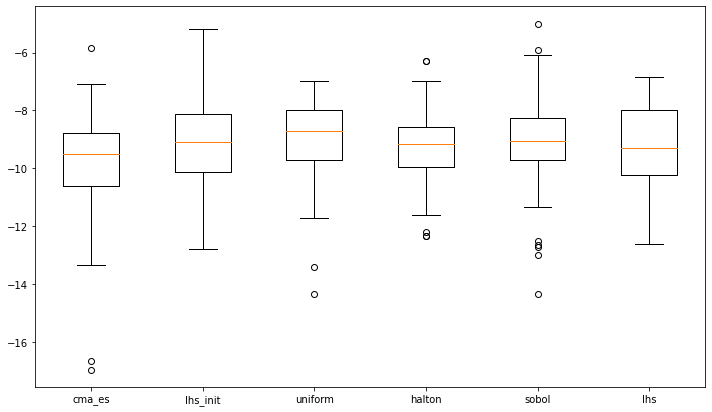

In [11]:
plt.rcParams["figure.figsize"] = (12, 7)

methods = ['cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['abs_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)

([<matplotlib.axis.XTick at 0x7fedd6dc35d0>,
 [Text(0, 0, 'cma_es'),
  Text(0, 0, 'lhs_init'),
  Text(0, 0, 'uniform'),
  Text(0, 0, 'halton'),
  Text(0, 0, 'sobol'),
  Text(0, 0, 'lhs')])

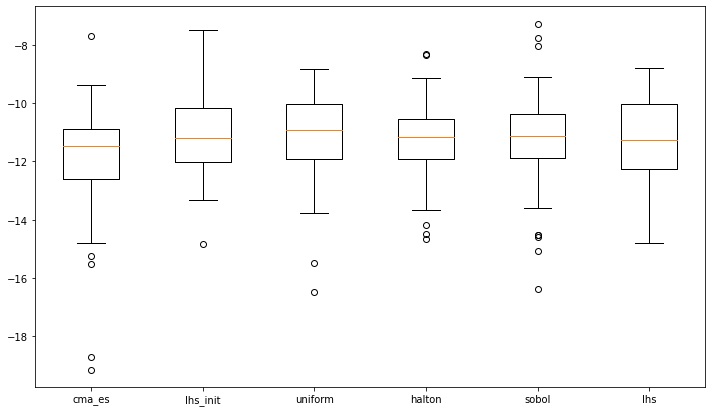

In [12]:
plt.rcParams["figure.figsize"] = (12, 7)

methods = ['cma_es', 'lhs_init', 'uniform', 'halton', 'sobol', 'lhs']
plt.boxplot([np.log(stats[method + '_regret'].div(stats['minmax_norm'])) for method in methods])
plt.xticks(list(range(1, len(methods) + 1)), methods)